In [1]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

import warnings
warnings.filterwarnings("ignore")

In [2]:
path='/mnt/cephfs/ml_data/mc_2021/'

data_real = pd.read_csv('{}processed_data/ProcessedTrainReal/ProcessedTrain_1M.csv.gz'.format(path))
data_real = data_real[data_real['edepR'] < 17.2]

In [3]:
# size = int(1e6)
n_feats = len(data_real.columns) - 5

X = data_real.iloc[:, :-5]#[:size]
y = data_real.iloc[:, -5]#[:size]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed: 18.4min
[Parallel(n_jobs=-1)]: Done  62 out of  91 | elapsed: 24.6min remaining: 11.5min
[Parallel(n_jobs=-1)]: Done  72 out of  91 | elapsed: 27.0min remaining:  7.1min
[Parallel(n_jobs=-1)]: Done  82 out of  91 | elapsed: 29.4min remaining:  3.2min
[Parallel(n_jobs=-1)]: Done  91 out of  91 | elapsed: 29.9min finished

[2021-09-04 19:56:10] Features: 1/15 -- score: -0.038249215991262464[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed: 20.5min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 23.5min
[Parallel(n_jobs=-1)]: Done  

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed: 29.5min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 29.9min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed: 59.6min
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed: 60.1min
[Parallel(n_jobs=-1)]: Done  51 out of  81 | elapsed: 90.0min remaining: 53.0min
[Parallel(n_jobs=-1)]: Done  60 out of  81 | elapsed: 90.4min remaining: 31.6min
[Parallel(n_jobs=-1)]: Done  69 out of  81 | elapsed: 119.9min remaining: 20.9min
[Parallel(n_jobs=-1)]: Done  78 out of  81 | elapsed: 120.0min remaining:  4.6min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed: 120.7min finished

[2021-09-05 15:35:46] Features: 11/15 -- score: -0.011944869316030919[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed: 29.5min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 29.9min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed: 59.3min
[Parallel(n_jobs=-1)]

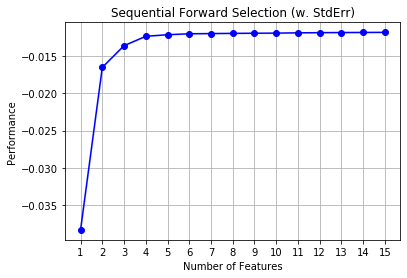

In [4]:
model = XGBRegressor(
    max_depth=9,
    learning_rate=0.08,
    n_estimators=300,
    random_state=22,
    tree_method='gpu_hist'
)

sfs = SFS(model,
          k_features=15,
          forward=True,
          floating=False,
          scoring='neg_mean_absolute_percentage_error',
          cv=5,
          verbose=10,
          n_jobs=-1,
#           fixed_features=['AccumCharge', 'nPMTs', 'z_cc', 'R_cht', 'pe_std']
)

sfs = sfs.fit(X, y)

fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [5]:
plt.savefig('feature_selection/SFS_XGB.png')

<Figure size 432x288 with 0 Axes>

In [6]:
results = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
results.to_csv('feature_selection/SFS_XGB_mlxtend_output.csv', index=False)

In [7]:
results['feature_names'].iloc[-1]

('AccumCharge',
 'nPMTs',
 'R_cc',
 'z_cc',
 'R_cht',
 'pho_cht',
 'phi_cht',
 'ht_kurtosis',
 'pe_std',
 'ht_5-2p',
 'ht_25-20p',
 'ht_30-25p',
 'ht_35-30p',
 'pe_25p',
 'pe_90p')

In [12]:
results

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(0,)","[-0.03820797141420556, -0.03825006786519814, -...",-0.038249,"(AccumCharge,)",0.00006,0.000047,0.000023
2,"(0, 13)","[-0.016580588812869057, -0.016551271907519625,...",-0.016558,"(AccumCharge, R_cht)",0.000018,0.000014,0.000007
3,"(0, 6, 13)","[-0.013684377321087404, -0.013668523506770102,...",-0.01366,"(AccumCharge, z_cc, R_cht)",0.000028,0.000022,0.000011
4,"(0, 6, 13, 28)","[-0.012428304097696559, -0.012404505007672853,...",-0.012407,"(AccumCharge, z_cc, R_cht, pe_std)",0.000025,0.000019,0.00001
5,"(0, 1, 6, 13, 28)","[-0.012214609318051475, -0.012191536530781857,...",-0.012196,"(AccumCharge, nPMTs, z_cc, R_cht, pe_std)",0.000027,0.000021,0.00001
6,"(0, 1, 6, 13, 27, 28)","[-0.01209969423779076, -0.012059517971983614, ...",-0.012072,"(AccumCharge, nPMTs, z_cc, R_cht, ht_kurtosis,...",0.000027,0.000021,0.00001
7,"(0, 1, 6, 13, 27, 28, 57)","[-0.012067413284459545, -0.01203653134192695, ...",-0.012041,"(AccumCharge, nPMTs, z_cc, R_cht, ht_kurtosis,...",0.000025,0.000019,0.00001
8,"(0, 1, 6, 13, 27, 28, 57, 89)","[-0.012047994678408565, -0.012010736564249766,...",-0.012015,"(AccumCharge, nPMTs, z_cc, R_cht, ht_kurtosis,...",0.000028,0.000022,0.000011
9,"(0, 1, 6, 13, 27, 28, 57, 76, 89)","[-0.012023410073696781, -0.011995293201701408,...",-0.011997,"(AccumCharge, nPMTs, z_cc, R_cht, ht_kurtosis,...",0.000026,0.00002,0.00001
10,"(0, 1, 2, 6, 13, 27, 28, 57, 76, 89)","[-0.01201555534346242, -0.011978702056153034, ...",-0.011983,"(AccumCharge, nPMTs, R_cc, z_cc, R_cht, ht_kur...",0.000025,0.000019,0.00001
